In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [16]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (14, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Loading Dataset

In [17]:
df = pd.read_csv("Customers.csv")

Visualization data

In [18]:
fig = px.histogram(df,x='Family Size',y='Spending Score',nbins=40,title="Relationship between family size and spending score")
fig.update_layout(bargap = 0.2)
fig.show()

In [19]:
px.histogram(df, x='Gender',
            y = 'Spending Score',
            title='Relationship between spending score and gender',
            color='Gender')

In [20]:
px.violin(df,x='Gender',y='Annual Income',color='Gender',title="Annual income vs gender")

In [21]:
px.scatter(df,x='Annual Income',y = 'Spending Score',color='Gender',title="Annual income vs spending score")

Correlation between annual income and spending score

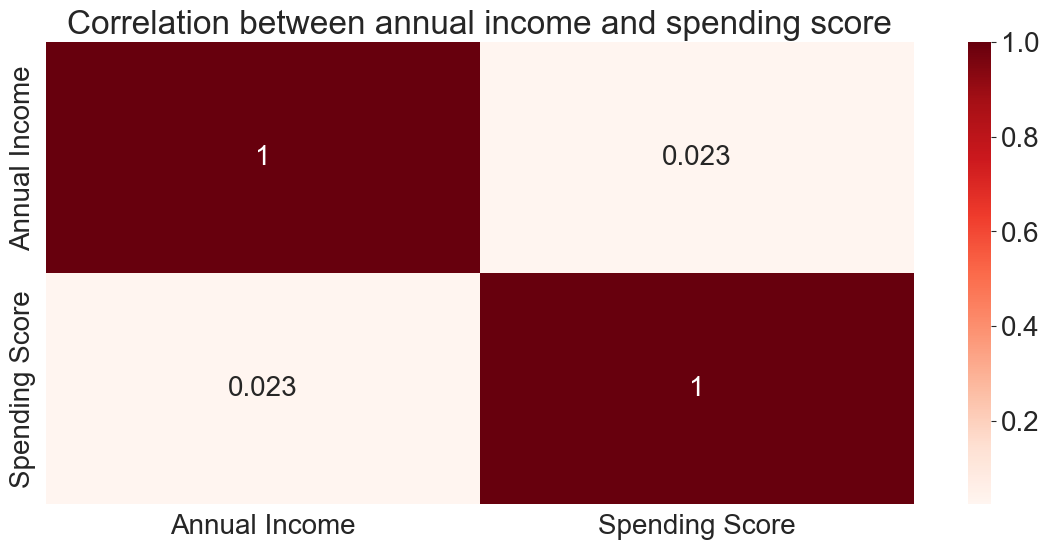

In [39]:
input_data = ['Annual Income','Spending Score']
sns.heatmap(df[input_data].corr(),cmap = 'Reds',annot=True)
plt.title("Correlation between annual income and spending score")
plt.show()

Preprocessing Data

In [23]:
# Min-max scale
data = df[input_data].copy()
data = ((data - data.min())/(data.max() - data.min()))*9 + 1
data

,Annual Income,Spending Score
0,1.710624,4.51
1,2.658122,8.29
2,5.074242,1.54
3,3.795119,7.93
4,2.800246,4.60
...,...,...
1995,9.735316,4.60
1996,4.465853,3.88
1997,5.309269,2.26
1998,9.627396,1.36


# K-means algorithms

Create random centroids

In [34]:
def random_centroids(data,k):
    centroids =[]
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

Get labels

In [35]:
def get_labels(data,centroids):
    distances = centroids.apply(lambda x:np.sqrt((data - x)**2).sum(axis=1))
    return distances.idxmin(axis=1)

Update centroids

In [36]:
def new_centroids(data,labels):
    return data.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

Plot K-means Iterations

In [37]:
from IPython.display import clear_output

def plot_clusters(data:pd.DataFrame,labels,centroids:pd.DataFrame,iteration):
    clear_output(wait=True)
    centroids = centroids.T
    centroids= centroids.values
    data = data.values
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data[:,0],y=data[:,1],c=labels,cmap='viridis')
    plt.scatter(x=centroids[:,0],y=centroids[:,1],marker="*",color = 'red',s = 100)
    plt.show()

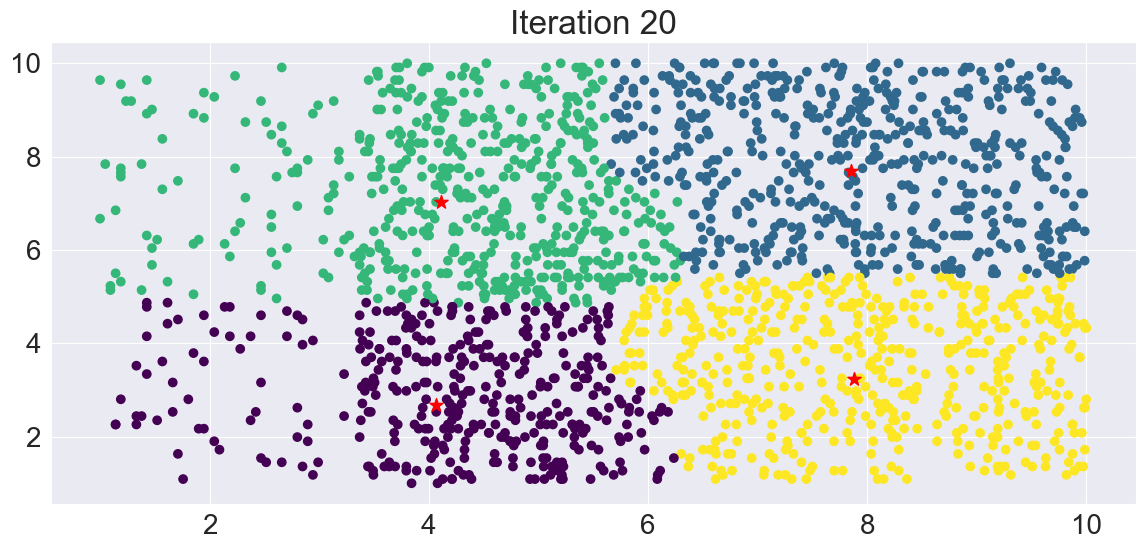

In [38]:
max_iterations = 100
k = 4
centroids = random_centroids(data,k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data,centroids)
    centroids = new_centroids(data=data,labels=labels)
    plot_clusters(data,labels,centroids,iteration)
    iteration += 1